In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

from cinnamon.drift import ModelDriftExplainer

# Iris Data

In [2]:
dataset = datasets.load_iris()

In [3]:
X = pd.DataFrame(dataset.data, columns = dataset.feature_names)
y = dataset.target

In [4]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
# This is multiclass classification pbm with 3 classes
np.unique(y, return_counts=True)

(array([0, 1, 2]), array([50, 50, 50]))

# Build XGBoost model

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2021)

In [7]:
clf = XGBClassifier(n_estimators=1000,
                    booster="gbtree",
                    learning_rate=0.05,
                    max_depth=6,
                    use_label_encoder=False,
                    seed=2021)

In [8]:
clf.fit(X=X_train, y=y_train, eval_set=[(X_test, y_test)], early_stopping_rounds=20, verbose=10)

[21:22:15] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0]	validation_0-mlogloss:1.03790
[10]	validation_0-mlogloss:0.62400
[20]	validation_0-mlogloss:0.41802
[30]	validation_0-mlogloss:0.30619
[40]	validation_0-mlogloss:0.24457
[50]	validation_0-mlogloss:0.21297
[60]	validation_0-mlogloss:0.19405
[70]	validation_0-mlogloss:0.18142
[80]	validation_0-mlogloss:0.17251
[90]	validation_0-mlogloss:0.16548
[100]	validation_0-mlogloss:0.16379
[110]	validation_0-mlogloss:0.16987
[115]	validation_0-mlogloss:0.17197


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=1000, n_jobs=12, num_parallel_tree=1,
              objective='multi:softprob', random_state=2021, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, seed=2021, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

# Analyze data drift with ModelDriftExplainer

The experiment is done with a random split so we should not detect a data drift

In [9]:
drift_explainer = ModelDriftExplainer(clf)

In [10]:
drift_explainer.fit(X1=X_train, X2=X_test, y1=y_train, y2=y_test)

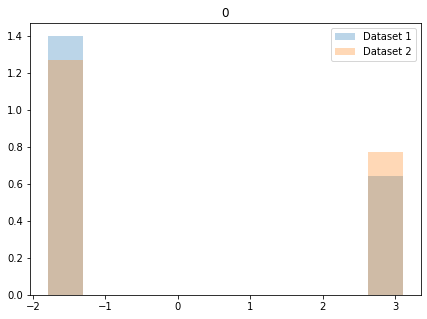

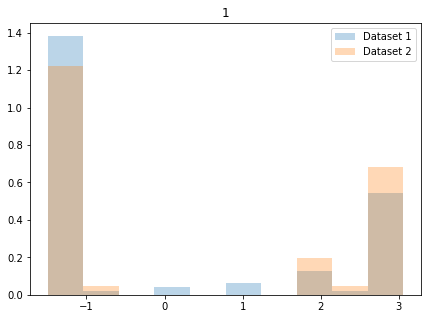

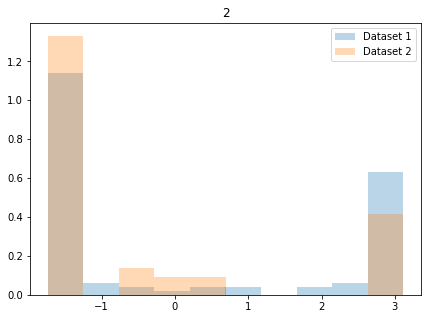

[DriftMetricsNum(mean_difference=0.31093458145383807, wasserstein=0.310934581453838, ks_test=BaseStatisticalTestResult(statistic=0.06349206349206349, pvalue=0.9987212484986795)),
 DriftMetricsNum(mean_difference=0.3232848411632908, wasserstein=0.3318073130907522, ks_test=BaseStatisticalTestResult(statistic=0.12698412698412698, pvalue=0.6467769104301898)),
 DriftMetricsNum(mean_difference=-0.5564053781212321, wasserstein=0.5568392310587188, ks_test=BaseStatisticalTestResult(statistic=0.17142857142857143, pvalue=0.2821678346768165))]

In [11]:
# no apparent drift in distributions of log-softmax predictions
drift_explainer.plot_prediction_drift()
drift_explainer.get_prediction_drift()

In [12]:
drift_explainer.get_target_drift()

DriftMetricsCat(wasserstein=0.09523809523809523, jensen_shannon=0.07382902143706498, chi2_test=Chi2TestResult(statistic=1.3333333333333333, pvalue=0.5134171190325922, dof=2, contingency_table=       0     1     2
X1  33.0  34.0  38.0
X2  17.0  16.0  12.0))

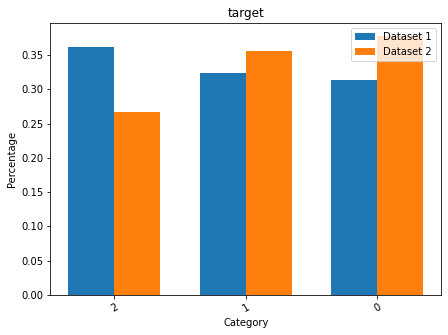

DriftMetricsCat(wasserstein=0.09523809523809523, jensen_shannon=0.07382902143706498, chi2_test=Chi2TestResult(statistic=1.3333333333333333, pvalue=0.5134171190325922, dof=2, contingency_table=       0     1     2
X1  33.0  34.0  38.0
X2  17.0  16.0  12.0))

In [13]:
# no apparent drift in distributions of target labels
drift_explainer.plot_target_drift()
drift_explainer.get_target_drift()

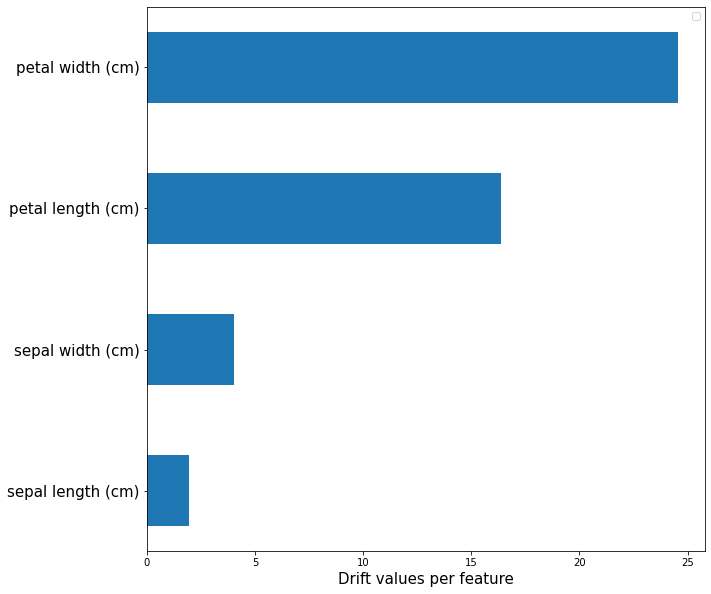

In [14]:
# plot drift values computed with the tree based approach (only for demonstration
# purpose since there is no data drift)
drift_explainer.plot_tree_based_drift_values(type='node_size')

In [15]:
drift_explainer.get_feature_drifts()

[DriftMetricsNum(mean_difference=-0.18571428571428505, wasserstein=0.19968253968253974, ks_test=BaseStatisticalTestResult(statistic=0.16507936507936508, pvalue=0.32376134275762936)),
 DriftMetricsNum(mean_difference=-0.08825396825396803, wasserstein=0.1301587301587301, ks_test=BaseStatisticalTestResult(statistic=0.14285714285714285, pvalue=0.499646880472137)),
 DriftMetricsNum(mean_difference=-0.2765079365079357, wasserstein=0.2777777777777778, ks_test=BaseStatisticalTestResult(statistic=0.1523809523809524, pvalue=0.41885114043708205)),
 DriftMetricsNum(mean_difference=-0.16412698412698457, wasserstein=0.16412698412698412, ks_test=BaseStatisticalTestResult(statistic=0.17142857142857143, pvalue=0.2821678346768165))]